In [ ]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')
%matplotlib inline
#%matplotlib qt

import os

Mounted at /content/drive/


In [ ]:

#Load Datasets

# -1 should be treated as NULL, as per the problem statement.
train = pd.read_csv('/content/drive/MyDrive/python practice /Ecommerce Classification/train.csv',delimiter=",", index_col=None, na_values='-1')
test = pd.read_csv('/content/drive/MyDrive/python practice /Ecommerce Classification/test.csv',delimiter=",", index_col=None, na_values='-1')

#Shape of the dataset
print('Train data shape: ', train.shape)
print('Test data shape: ', test.shape)

Train data shape:  (347841, 33)
Test data shape:  (86961, 32)


In [ ]:

train.head()

,unique_id,metric1,metric2,metric6,metric3,metric4,metric5,binary_var1,region,sourceMedium,...,page4_top,page4_exits,visited_page4,page5_top,page5_exits,visited_page5,page6_top,page6_exits,visited_page6,target
0,1,4,1,2,5.0,5.0,0.0,0,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0
1,2,0,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,3a987a7bb0a840a40d80e301132f138c,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0
2,3,0,1,6,37.2,186.0,0.0,1,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0.0,NaN,0,0.0,NaN,0,30.0,0.0,1,0
3,4,24,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,335cceef7d447b13ae8fc7c0e0a7e826,...,0.0,NaN,0,0.0,NaN,0,0.0,1.0,1,0
4,5,0,1,1,0.0,4.0,0.0,0,3a2d6295a828fc1ec5084af382b61e35,335cceef7d447b13ae8fc7c0e0a7e826,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0


In [ ]:
# Column wise Nulls

null_columns=train.columns[train.isnull().any()]
null_ = train[null_columns].isnull().sum()
train_w_null_cols = (null_/train.shape[0])*100 
print (train_w_null_cols)

page1_exits    98.505927
page2_exits    99.989363
page3_exits    91.757153
page4_exits    98.269324
page5_exits    99.808533
page6_exits    55.573380
dtype: float64


In [ ]:
## All the above columns has more than "50%" of its value as Null, 
## So there is not much information avaialble to explain 'target'

#### Removing those columns:
drop_col = train_w_null_cols.index.tolist()
train.drop(drop_col, axis = 1, inplace=True)
print ('Train size after dropping columns: ', train.shape)

Train size after dropping columns:  (347841, 27)


In [ ]:
# Row wise Nulls

def num_missing(x):
    return sum(x.isnull())

train_row = train.apply(num_missing, axis=1) #axis=1 defines that function is to be applied on each row

df1 = pd.DataFrame(index=train_row.index)
df1['value'] = train_row

threshold = np.round(train.shape[1] * 0.20)

df2 = df1[df1.value > threshold]
null_row_index = df2.index

In [ ]:

## Check for class imabalance in target
train.target.value_counts()

0    316036
1     31805
Name: target, dtype: int64

In [ ]:
# Page1_Visited means whether unique id has visited the page or not => categorical
for col in ['visited_page1', 'visited_page2', 'visited_page3',  'visited_page4', 'visited_page5', 'visited_page6']:
    train[col] = train[col].astype('category')

# Binary_Var contains binary values
for col in ['binary_var1', 'binary_var2']:
    train[col] = train[col].astype('category')

# region/sourceMedium/country/device are also treated categorical
for col in ['region', 'sourceMedium', 'device', 'country']:
    train[col] = train[col].astype('category')

train['target'] = train['target'].astype('category')

In [ ]:

import scipy.stats as scs

## Chi-square analysis on all categorical variables w.r.t target variable:
cat_cols = ['visited_page1', 'visited_page2', 'visited_page3',  'visited_page4', 'visited_page5', 'visited_page6',
            'binary_var1', 'binary_var2', 'region', 'sourceMedium', 'device', 'country']
print ('*==Chi2 analysis wrt target==*')

rec_ = []
for col in cat_cols:
    chi2 = scs.chi2_contingency(pd.crosstab(index=train[col],columns=train['target']))
    rec = chi2[0:3]
    rec_.append(rec)
    
rec_tab = pd.DataFrame(rec_, columns = ['chi2_statistic', 'p_value', 'degrees_of_freedom'])
rec_tab.index = cat_cols
rec_tab

*==Chi2 analysis wrt target==*


,chi2_statistic,p_value,degrees_of_freedom
visited_page1,413.413665,6.623182e-92,1
visited_page2,0.004445,9.468411e-01,1
visited_page3,4976.188142,0.000000e+00,1
visited_page4,51.478897,7.237086e-13,1
visited_page5,18.087204,2.110148e-05,1
visited_page6,1216.158657,1.877550e-266,1
binary_var1,17808.556720,0.000000e+00,1
binary_var2,39757.633605,0.000000e+00,1
region,15094.784886,0.000000e+00,562
sourceMedium,46616.356384,0.000000e+00,461


In [ ]:

# working with numerical columns to see if there is any relation

#excluding dayhourminute column for now
num_cols = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5','metric6', 'page1_top', 'page2_top', 'page3_top', 'page4_top',
           'page5_top', 'page6_top']

num_data = train[num_cols]

In [ ]:
## Correlation between all numeric column variables
num_data.corr()

,metric1,metric2,metric3,metric4,metric5,metric6,page1_top,page2_top,page3_top,page4_top,page5_top,page6_top
metric1,1.000000,-0.008537,0.009634,0.004209,-0.031370,-0.015225,0.001031,-0.000667,0.004716,0.001086,0.002267,0.013038
metric2,-0.008537,1.000000,0.155708,0.166962,-0.098065,0.474780,0.031139,0.017599,0.084436,0.026918,0.013206,0.163855
metric3,0.009634,0.155708,1.000000,0.523589,-0.347091,0.122781,0.059809,0.006426,0.154935,0.048063,0.017685,0.465361
metric4,0.004209,0.166962,0.523589,1.000000,-0.377635,0.505131,0.072670,0.010511,0.187027,0.068701,0.035177,0.371861
metric5,-0.031370,-0.098065,-0.347091,-0.377635,1.000000,-0.297294,-0.034220,-0.003459,-0.091830,-0.040796,-0.012791,-0.228760
metric6,-0.015225,0.474780,0.122781,0.505131,-0.297294,1.000000,0.044048,0.018550,0.100708,0.043128,0.021154,0.167633
page1_top,0.001031,0.031139,0.059809,0.072670,-0.034220,0.044048,1.000000,0.012238,0.043315,0.046827,0.020456,0.014232
page2_top,-0.000667,0.017599,0.006426,0.010511,-0.003459,0.018550,0.012238,1.000000,0.025778,0.001379,-0.000094,0.005923
page3_top,0.004716,0.084436,0.154935,0.187027,-0.091830,0.100708,0.043315,0.025778,1.000000,0.042171,0.014336,0.047500
page4_top,0.001086,0.026918,0.048063,0.068701,-0.040796,0.043128,0.046827,0.001379,0.042171,1.000000,0.017078,0.018260


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6568431f90>,
      dtype=object)

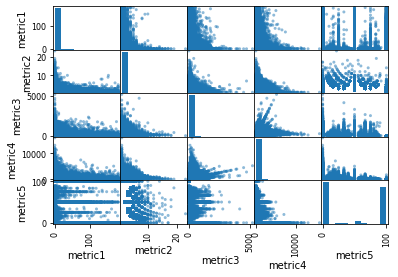

In [ ]:
# Scatter plot between all the metric variables

pd.plotting.scatter_matrix(num_data[num_cols[0:5]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6563c4ee10>,
      dtype=object)

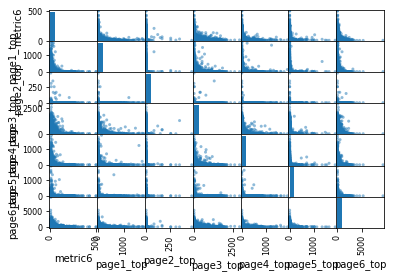

In [ ]:

# Scatter plot between all the page_top variables
pd.plotting.scatter_matrix(num_data[num_cols[5:]])

In [ ]:

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


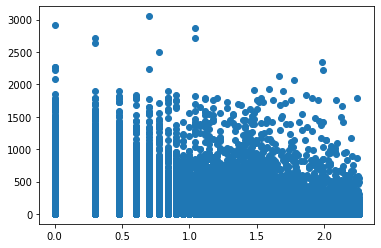

In [ ]:

plt.scatter(np.log10(num_data['metric1']), num_data['metric3'])

In [ ]:
metric1_inv = np.divide(np.ones_like(num_data['metric1'])*1.0, num_data['metric1'])

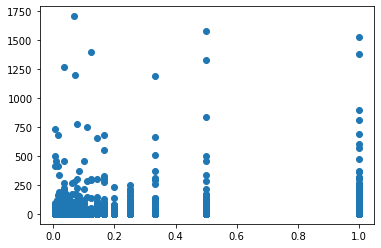

In [ ]:

plt.scatter(metric1_inv, num_data['page1_top'])

In [ ]:

len(metric1_inv.unique())

183

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [ ]:
def evaluate_model(target_true,target_predicted):
    print ("Confusion Matrix: \n", confusion_matrix(target_true,target_predicted))
    print ("\nClassification Report: \n",classification_report(target_true,target_predicted))
    print ("\nThe Accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted)))
    print ("\nAUC_ROC Score is {:.2%}".format(roc_auc_score(target_true,target_predicted)))

In [ ]:

train['metric1_inv'] = np.divide(np.ones_like(train['metric1'])*1.0, train['metric1'])

In [ ]:
# Splitting the training data to train and validation sets
X = train[train.columns.difference(['target'])]
Y = train['target']

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=42)

In [ ]:

print (X_train.columns)

Index(['binary_var1', 'binary_var2', 'country', 'dayHourMinute', 'device',
       'metric1', 'metric1_inv', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'page1_top', 'page2_top', 'page3_top', 'page4_top',
       'page5_top', 'page6_top', 'region', 'sourceMedium', 'unique_id',
       'visited_page1', 'visited_page2', 'visited_page3', 'visited_page4',
       'visited_page5', 'visited_page6'],
      dtype='object')


In [ ]:

use_cols = ['binary_var1', 'binary_var2', 'dayHourMinute', 
       #'metric2', 'metric3', 'metric4', 
        'metric5', 'metric6',
       'page2_top', 'page3_top', 'page4_top', 'page5_top', # 'page1_top', 'page6_top',
        #'region', #'sourceMedium', 'device', 'country',
       'visited_page2', 
        'metric1', 
        'visited_page1', 'visited_page3', 'visited_page4', 'visited_page5', 'visited_page6',
           ]

In [ ]:

# Random Forests
params = {'max_depth':14,'min_samples_split':3,
          'n_jobs':1, 
          'n_estimators': 700,
          'class_weight':'balanced_subsample'}
forest = RandomForestClassifier(**params)
classifier = forest.fit(X_train[use_cols], Y_train)

# Train
predicted = classifier.predict(X_train[use_cols])
evaluate_model(Y_train,predicted)

Confusion Matrix: 
 [[180398  40734]
 [  3747  18609]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    221132
           1       0.31      0.83      0.46     22356

    accuracy                           0.82    243488
   macro avg       0.65      0.82      0.67    243488
weighted avg       0.92      0.82      0.85    243488


The Accuracy score is 81.73%

AUC_ROC Score is 82.41%


In [ ]:
# Predictions on Val set
predicted = classifier.predict(X_val[use_cols])
evaluate_model(Y_val,predicted)

Confusion Matrix: 
 [[76999 17905]
 [ 1961  7488]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     94904
           1       0.29      0.79      0.43      9449

    accuracy                           0.81    104353
   macro avg       0.64      0.80      0.66    104353
weighted avg       0.91      0.81      0.84    104353


The Accuracy score is 80.96%

AUC_ROC Score is 80.19%
